In [52]:
%matplotlib inline
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

apellido = 'CAMINO'

In [53]:
gdf_comunas = gpd.read_file('COMUNA/COMUNAS_2020.shp')
gdf_comunas = gdf_comunas[ (gdf_comunas.PROVINCIA == 'Santiago') 
                          & (gdf_comunas.COMUNA != 'Lo Barnechea') 
                          | (gdf_comunas.COMUNA == 'Puente Alto')
                          | (gdf_comunas.COMUNA == 'San Bernardo')]
gdf_comunas = gdf_comunas.drop(columns=['CUT_REG', 'CUT_PROV', 'REGION', 'PROVINCIA', 'SUPERFICIE'])

In [54]:
gdf_comunas['centroid'] = gdf_comunas['geometry'].centroid
gdf_comunas.head()

<ipython-input-54-df3653cfeb52>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_comunas['centroid'] = gdf_comunas['geometry'].centroid


,CUT_COM,COMUNA,geometry,centroid
292,13125,Quilicura,"POLYGON ((-70.68168 -33.33087, -70.68145 -33.3...",POINT (-70.73521 -33.35558)
293,13124,Pudahuel,"POLYGON ((-70.75691 -33.38372, -70.75767 -33.3...",POINT (-70.85480 -33.42430)
294,13103,Cerro Navia,"POLYGON ((-70.71922 -33.41332, -70.71891 -33.4...",POINT (-70.74395 -33.42219)
295,13128,Renca,"POLYGON ((-70.69250 -33.38347, -70.69183 -33.3...",POINT (-70.72759 -33.40179)
296,13126,Quinta Normal,"POLYGON ((-70.68007 -33.43844, -70.68177 -33.4...",POINT (-70.70105 -33.42758)


In [55]:
conn = psycopg2.connect(database="Test1", user="postgres", password="232686", host="localhost", port="5432")

df = pd.read_sql(f"SELECT \"CUT\", COUNT(*)  FROM \"PADRON\".\"BASE_SERVEL\" WHERE (\"PROVINCIA\" = 'SANTIAGO'  OR \"COMUNA\" = 'SAN BERNARDO' OR \"COMUNA\" = 'PUENTE ALTO') AND \"NOMBRE_COMPLETO\" LIKE '% {apellido} %' GROUP BY \"CUT\"", conn)
df.head()

,CUT,count
0,13101,9
1,13103,2
2,13105,1
3,13108,2
4,13110,1


In [56]:
gdf_comunas = gdf_comunas.join(df.set_index('CUT'), on='CUT_COM')
gdf_comunas['count'] = gdf_comunas['count'].fillna(0)
gdf_comunas.head()

,CUT_COM,COMUNA,geometry,centroid,count
292,13125,Quilicura,"POLYGON ((-70.68168 -33.33087, -70.68145 -33.3...",POINT (-70.73521 -33.35558),0.0
293,13124,Pudahuel,"POLYGON ((-70.75691 -33.38372, -70.75767 -33.3...",POINT (-70.85480 -33.42430),0.0
294,13103,Cerro Navia,"POLYGON ((-70.71922 -33.41332, -70.71891 -33.4...",POINT (-70.74395 -33.42219),2.0
295,13128,Renca,"POLYGON ((-70.69250 -33.38347, -70.69183 -33.3...",POINT (-70.72759 -33.40179),0.0
296,13126,Quinta Normal,"POLYGON ((-70.68007 -33.43844, -70.68177 -33.4...",POINT (-70.70105 -33.42758),0.0


(-70.98161889274995,
 -70.40092210024996,
 -33.776706806799965,
 -33.296125391199936)

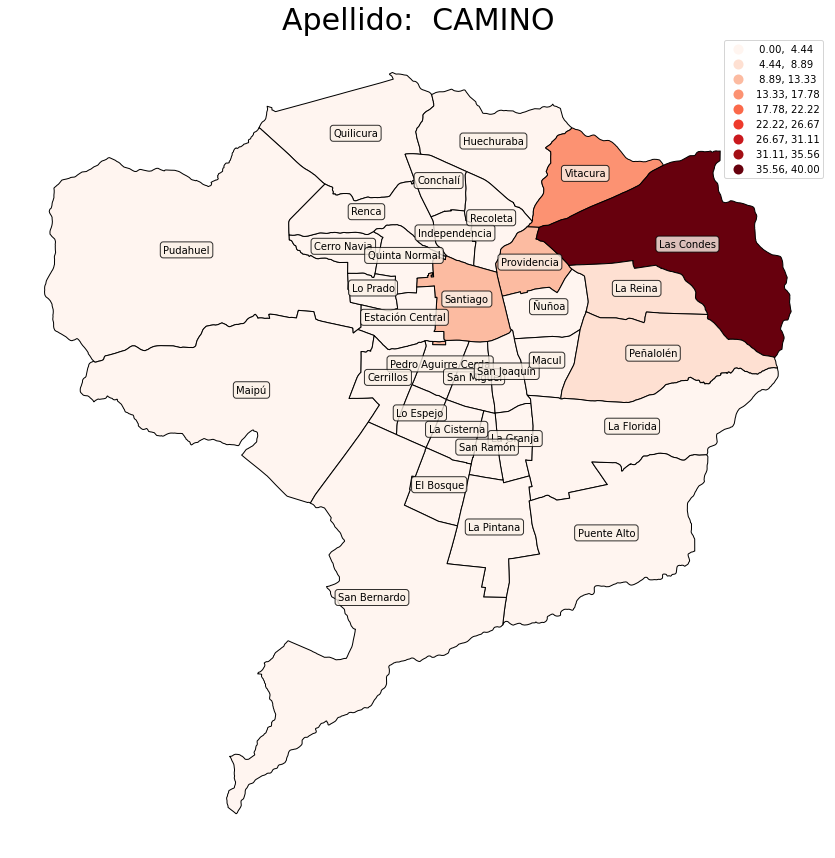

In [57]:
figsize = (15, 15)

fig, ax = plt.subplots(1, figsize=figsize)

gdf_comunas.plot(column='count',  # columna para categorizar
                 edgecolor='black',
                 cmap='Reds',
                 scheme='equal_interval',
                 k=9,
                 legend=True,
                 ax=ax)
plt.title(f'Apellido:  {apellido}',
               fontdict={'fontsize': '30',
                         'fontweight' : '7'})
props = dict(boxstyle='round', facecolor='linen', alpha=0.8)
for point in gdf_comunas.iterrows():
    ax.text(point[1]['centroid'].x,
            point[1]['centroid'].y,
            point[1]['COMUNA'],
            horizontalalignment='center',
            fontsize=10,
            bbox=props)
ax.axis('off')
